In [22]:
import pandas as pd

# 파일 경로
file_path = '/content/sample_data/시계열분석_복합SCFI_2017.xlsx'

# 데이터 불러오기
data = pd.read_excel(file_path)

# 데이터의 처음 몇 행을 확인
data.head()
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# YYYYMM을 datetime으로 변환
data['YYYYMM'] = pd.to_datetime(data['YYYYMM'], format='%Y-%m')

# 인덱스 설정
data.set_index('YYYYMM', inplace=True)

# 데이터를 훈련 세트와 테스트 세트로 분리 (마지막 6개월을 테스트 데이터로 설정)
train = data[:-6]
test = data[-6:]

# 훈련 데이터와 테스트 데이터의 개요 확인
train.shape, test.shape, train.head(), test.head()


((39, 1),
 (6, 1),
               SCFI_C
 YYYYMM              
 2014-01-01  1174.866
 2014-02-01  1069.362
 2014-03-01   969.145
 2014-04-01  1078.462
 2014-05-01  1137.112,
              SCFI_C
 YYYYMM             
 2017-04-01  834.060
 2017-05-01  860.922
 2017-06-01  869.764
 2017-07-01  878.540
 2017-08-01  864.205)

1)	ADF(Augmented Dickey-Fuller) 테스트 결과의 p-value는 0.379로, 0.05보다 높다. 이는 시계열 데이터가 정상성을 만족하지 않는다는 것을 의미한다.

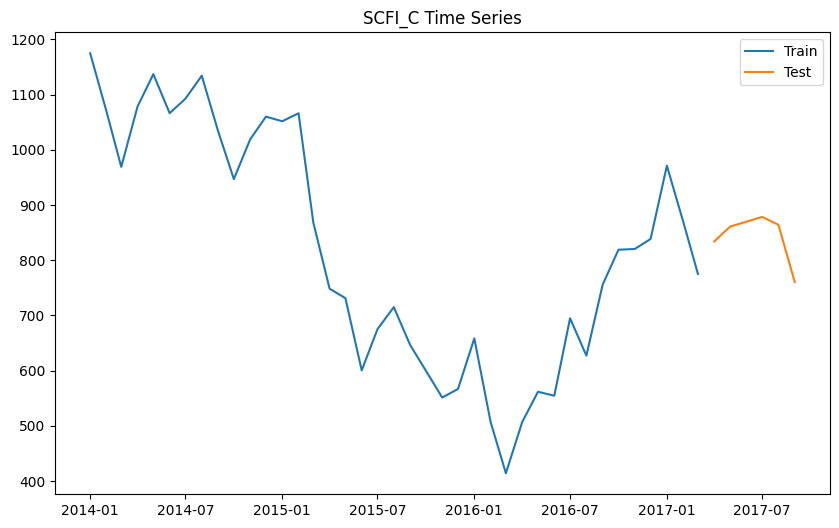

Test Statistic                 -1.802635
p-value                         0.379154
#Lags Used                      0.000000
Number of Observations Used    38.000000
Critical Value (1%)            -3.615509
Critical Value (5%)            -2.941262
Critical Value (10%)           -2.609200
dtype: float64

In [23]:
from statsmodels.tsa.stattools import adfuller

# 시계열 플롯
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.title('SCFI_C Time Series')
plt.legend()
plt.show()

# ADF 테스트
adf_test = adfuller(train['SCFI_C'])

# ADF 테스트 결과 출력
adf_output = pd.Series(adf_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in adf_test[4].items():
    adf_output['Critical Value (%s)' % key] = value

adf_output


# 도표 18-5. ARIMA 1차분 후 시계열 그래프

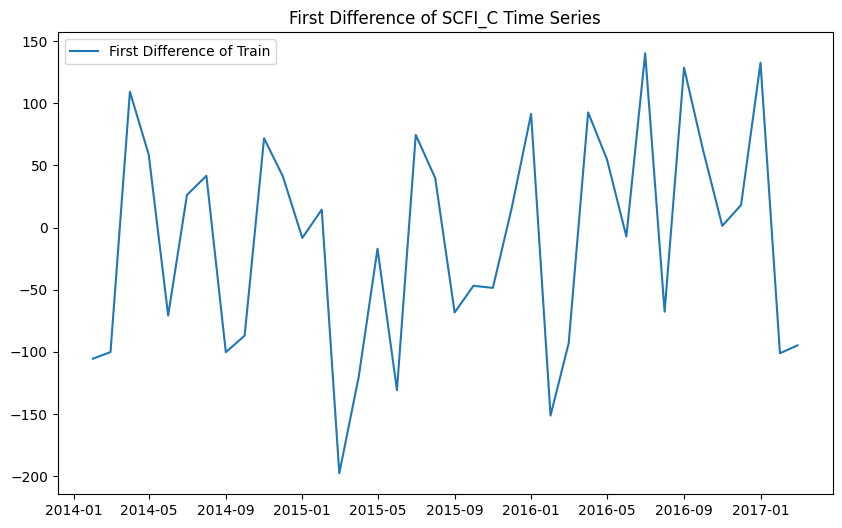

In [24]:
# 1차 차분
train_diff = train.diff().dropna()

# 1차 차분 후의 시계열 플롯
plt.figure(figsize=(10, 6))
plt.plot(train_diff, label='First Difference of Train')
plt.title('First Difference of SCFI_C Time Series')
plt.legend()
plt.show()

# 도표 18-6. ACF 및 PACF 플롯의 파이썬 코드

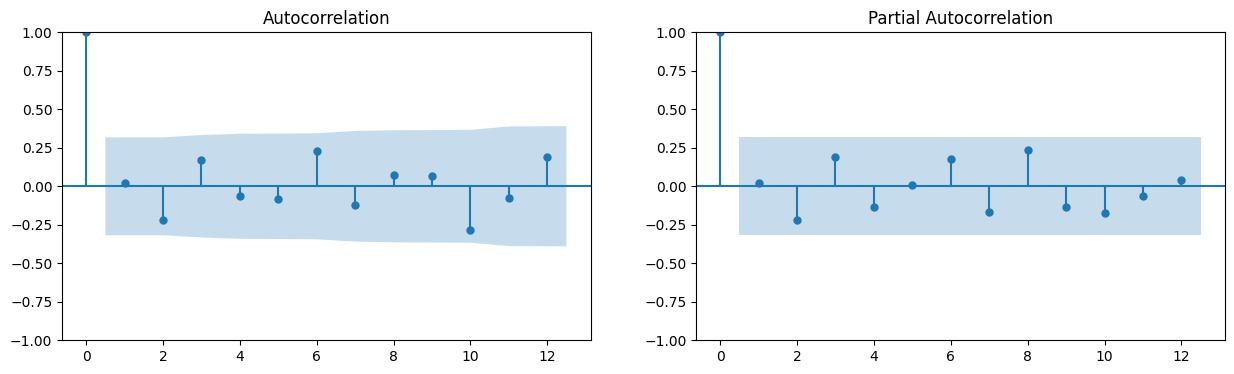

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))

# ACF 및 PACF 플롯(수정 전: 코랩에서 실행 시 에러 발생, 데이터가 부족한 경우 발생)
# plot_acf(train_diff, ax=ax[0], lags=20)  # ACF
# plot_pacf(train_diff, ax=ax[1], lags=20)  # PACF

# ACF 및 PACF 플롯 수정 (수정 후: lags를 12로 조정)
plot_acf(train_diff, ax=ax[0], lags=12)  # ACF
plot_pacf(train_diff, ax=ax[1], lags=12)  # PACF
plt.show()



# 도표 18-7. ARIMA 모형 (p=1, d=1, q=1) 파이썬 코드와 예측 결과

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


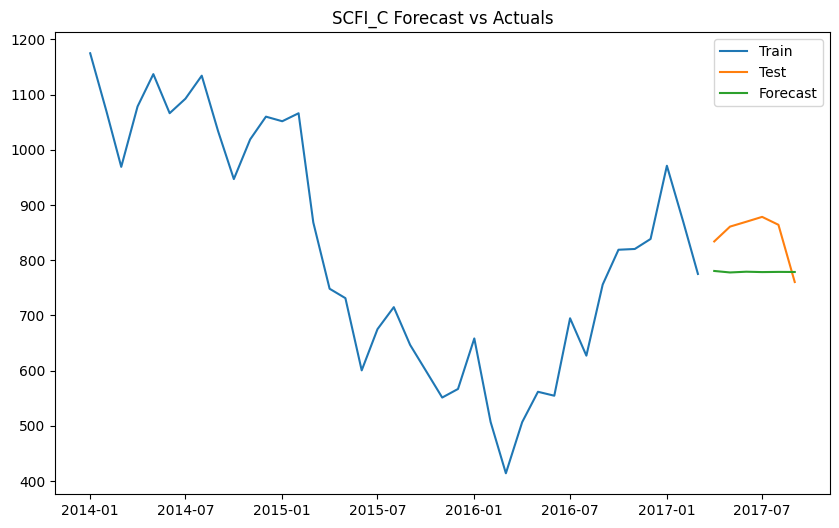

(76.98788058629906,
 2017-04-01    780.576936
 2017-05-01    777.871595
 2017-06-01    779.226205
 2017-07-01    778.547929
 2017-08-01    778.887553
 2017-09-01    778.717498
 Freq: MS, Name: predicted_mean, dtype: float64)

In [26]:
# ARIMA 모델 적합 (p=1, d=1, q=1)
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

# 테스트 데이터에 대한 예측
forecast = model_fit.forecast(steps=len(test))

# 테스트 데이터와 예측 값 비교
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.title('SCFI_C Forecast vs Actuals')
plt.legend()
plt.show()

# RMSE 계산
rmse = np.sqrt(mean_squared_error(test, forecast))
rmse, forecast


# 도표 18-8. 잔차의 시계열 플롯, ACF 플롯, ADF 테스트 파이썬 코드

# 도표 18-9. ARIMA(1,1,1) 모형의 잔차 시계열 그래프

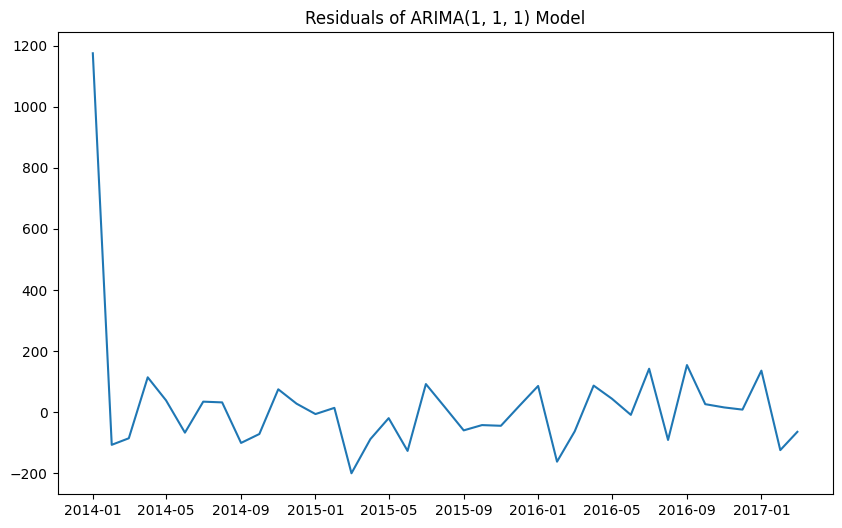

<Figure size 1000x600 with 0 Axes>

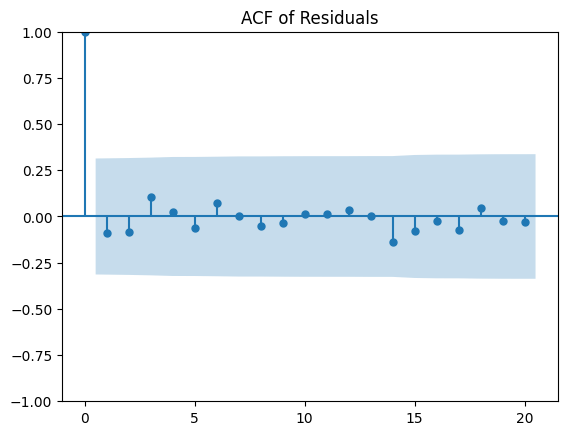

Test Statistic                -1.618383e+01
p-value                        4.239160e-29
#Lags Used                     0.000000e+00
Number of Observations Used    3.800000e+01
Critical Value (1%)           -3.615509e+00
Critical Value (5%)           -2.941262e+00
Critical Value (10%)          -2.609200e+00
dtype: float64

In [27]:
# 잔차 추출
residuals = model_fit.resid

# 잔차의 시계열 플롯
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of ARIMA(1, 1, 1) Model')
plt.show()

# 잔차의 ACF 플롯
plt.figure(figsize=(10, 6))
plot_acf(residuals, lags=20)
plt.title('ACF of Residuals')
plt.show()

# 잔차의 정상성 검사 (ADF Test)
adf_test_resid = adfuller(residuals.dropna())
adf_output_resid = pd.Series(adf_test_resid[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in adf_test_resid[4].items():
    adf_output_resid['Critical Value (%s)' % key] = value

adf_output_resid


# 도표 18-10. ACF 그래프와 ADF 테스트 결과

<Figure size 1000x600 with 0 Axes>

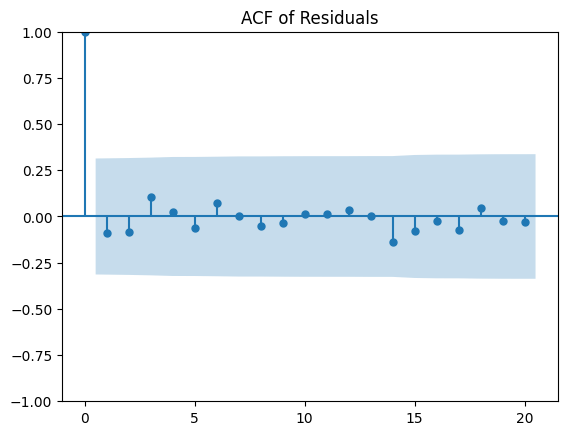

Test Statistic                -1.618383e+01
p-value                        4.239160e-29
#Lags Used                     0.000000e+00
Number of Observations Used    3.800000e+01
Critical Value (1%)           -3.615509e+00
Critical Value (5%)           -2.941262e+00
Critical Value (10%)          -2.609200e+00
dtype: float64

In [35]:

# 잔차의 ACF 플롯
plt.figure(figsize=(10, 6))
plot_acf(residuals, lags=20)
plt.title('ACF of Residuals')
plt.show()



# 잔차의 정상성 검사 (ADF Test)
adf_test_resid = adfuller(residuals.dropna())
adf_output_resid = pd.Series(adf_test_resid[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in adf_test_resid[4].items():
    adf_output_resid['Critical Value (%s)' % key] = value

adf_output_resid

In [29]:
residuals

YYYYMM
2014-01-01    1174.866000
2014-02-01    -106.698248
2014-03-01     -85.250038
2014-04-01     114.298099
2014-05-01      38.867102
2014-06-01     -66.829014
2014-07-01      34.590649
2014-08-01      32.176934
2014-09-01    -100.502477
2014-10-01     -71.312081
2014-11-01      75.054450
2014-12-01      27.973108
2015-01-01      -6.027486
2015-02-01      14.239963
2015-03-01    -199.842597
2015-04-01     -88.064000
2015-05-01     -19.429698
2015-06-01    -126.623087
2015-07-01      92.158970
2015-08-01      16.821243
2015-09-01     -59.407812
2015-10-01     -42.124104
2015-11-01     -44.380309
2015-12-01      20.328271
2016-01-01      85.967852
2016-02-01    -161.839442
2016-03-01     -62.565507
2016-04-01      87.176631
2016-05-01      44.188353
2016-06-01      -8.610326
2016-07-01     142.344759
2016-08-01     -90.770154
2016-09-01     154.341670
2016-10-01      26.347253
2016-11-01      15.701080
2016-12-01       8.531039
2017-01-01     136.092600
2017-02-01    -123.992908
2017-

# 도표 18-11. 잔차에 대한 Ljung-Box 검정

In [34]:
from statsmodels.stats.diagnostic import acorr_ljungbox
# Ljung-Box 검정 수행
ljung_box_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
ljung_box_test

,lb_stat,lb_pvalue
10,1.849082,0.997371


<Axes: title={'center': 'Density'}, ylabel='Density'>

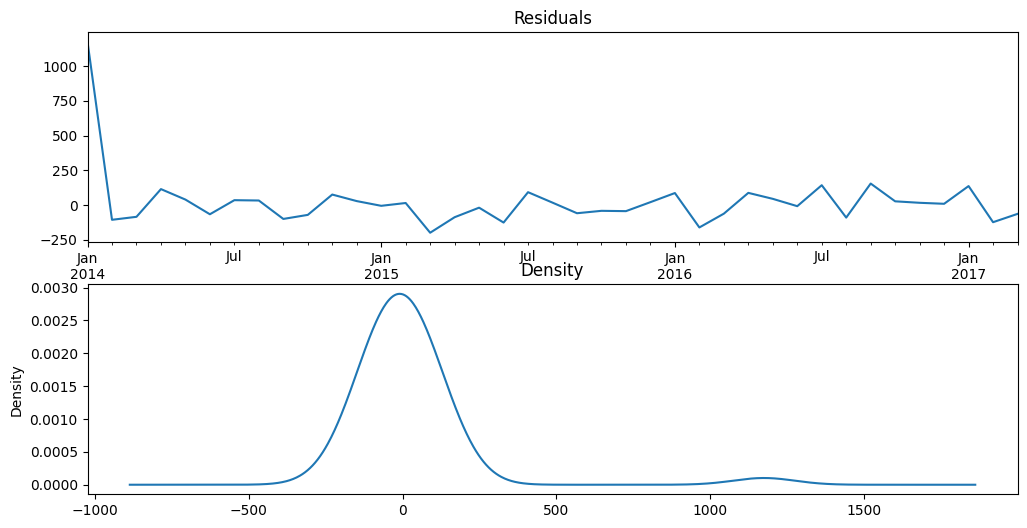

In [33]:
# Plotting the residuals
plt.figure(figsize=(12, 6))
plt.subplot(211)
residuals.plot(title='Residuals')
plt.subplot(212)
residuals.plot(kind='kde', title='Density')